In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jaxquantum as jqt
import jaxquantum.circuits as jqtc
import jaxquantum.codes as jqtb
from jax import jit, grad
import jax.numpy as jnp
from math import prod
import matplotlib.pyplot as plt

from tqdm import tqdm

import jax
import optax
import functools

Text(0.5, 1.0, 'Squeezing level: 10.46 dB')

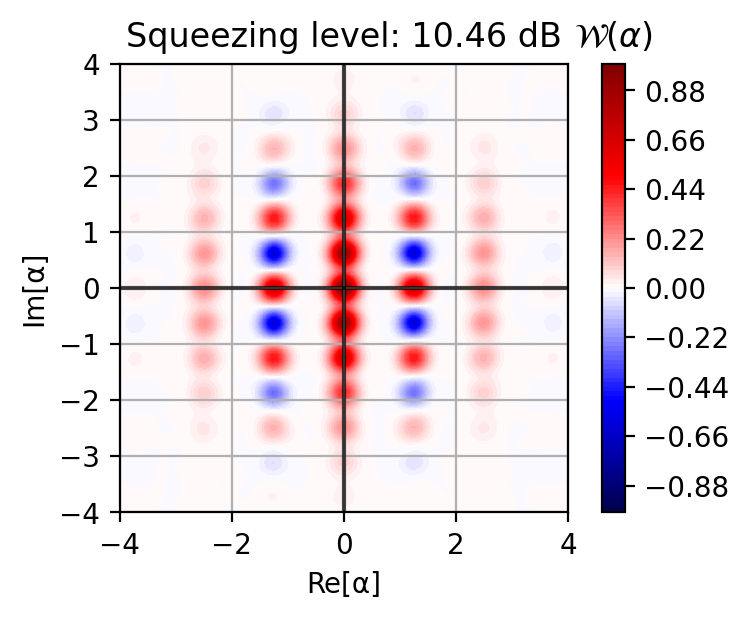

In [29]:
delta = 0.3
gkp_qubit = jqtb.GKPQubit({"delta": delta, "N": 50})
squeezing_level = 20*jnp.log10(jnp.exp(jnp.abs(jnp.log(delta))))

gkp_plus_z = gkp_qubit.basis["+z"]
pts = jnp.linspace(-4,4, 101)
ax, im = jqt.plot_wigner(target_state, pts)
ax.set_xlabel("Re[α]")
ax.set_ylabel("Im[α]")
ax.set_title(f"Squeezing level: {squeezing_level:.2f} dB")

In [45]:
def sBs_round(initial_state):
    N = initial_state.space_dims[1]
    reg = jqtc.Register([2,N])

    cirq = jqtc.Circuit.create(reg, layers=[])
    
    # cirq.append(jqtc.Rx(jnp.pi/2), 0)
    cirq.append(jqtc.CD(N, 2.0), [0, 1])

    res = jqtc.simulate(cirq, initial_state, mode="default")
    final_state = res[-1][-1]

    final_state = jqt.basis(2,0).to_dm() ^ final_state.ptrace(1)
    return final_state 

Text(62.44444444444453, 0.5, 'Im[α]')

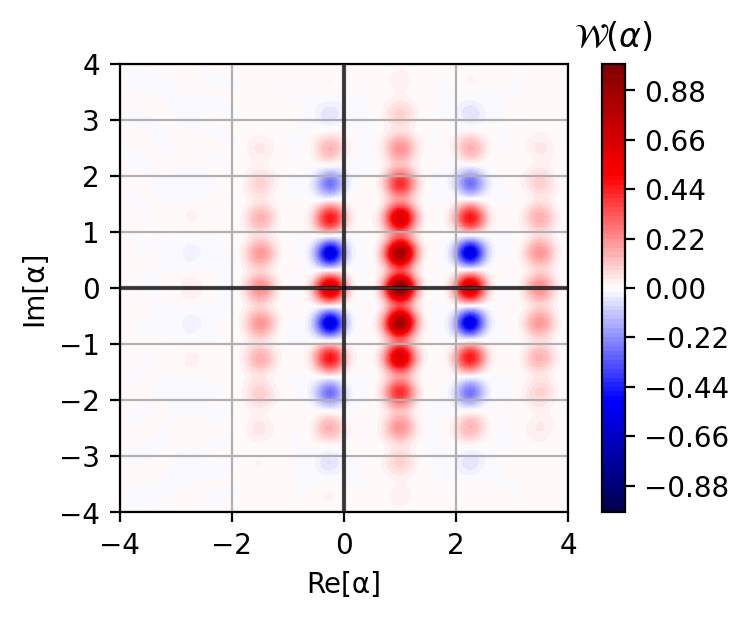

In [46]:
current_state = jqt.basis(2,0) ^ gkp_plus_z
current_state = sBs_round(current_state)
current_state = current_state.ptrace(1)
# jqt.overlap(current_state, Lz)


pts = jnp.linspace(-4,4, 101)
ax, im = jqt.plot_wigner(current_state, pts)
ax.set_xlabel("Re[α]")
ax.set_ylabel("Im[α]")